In [25]:
# imports
import warnings
warnings.filterwarnings('ignore')
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from datetime import date
import numpy as np
from MCForecastTools import MCSimulation
import os
import alpaca_trade_api as tradeapi
%matplotlib inline 

In [2]:
today = date.today()
today

datetime.date(2021, 11, 13)

In [3]:
# get mapbox key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [4]:
#import data
file_path = Path("Cryptos.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.dropna(inplace=True)

In [5]:
sfo_data.head(10)

,Date,BTC,ETH,XRP,ADA
740,11/28/2017,9949.00,468.52,0.198750,0.101595
741,11/29/2017,9935.98,434.01,0.203189,0.096775
742,11/30/2017,9903.00,434.00,0.193549,0.108201
743,12/1/2017,10869.84,463.82,0.216402,0.109190
744,12/2/2017,10930.24,460.34,0.218381,0.112500
745,12/3/2017,11290.00,464.76,0.225001,0.114692
746,12/4/2017,11643.98,468.22,0.229385,0.117558
747,12/5/2017,11718.35,457.30,0.235117,0.132274
748,12/6/2017,14090.00,432.49,0.132274,0.161659
749,12/7/2017,17390.01,433.28,0.161659,0.159267


In [6]:
sfo_data = sfo_data.set_index('Date')
sfo_data

,BTC,ETH,XRP,ADA
Date,,,,
11/28/2017,9949.00,468.52,0.198750,0.101595
11/29/2017,9935.98,434.01,0.203189,0.096775
11/30/2017,9903.00,434.00,0.193549,0.108201
12/1/2017,10869.84,463.82,0.216402,0.109190
12/2/2017,10930.24,460.34,0.218381,0.112500
...,...,...,...,...
11/6/2021,61539.30,4516.16,1.152258,2.020428
11/7/2021,63272.20,4616.89,1.216725,2.130279
11/8/2021,67582.60,4818.97,1.286268,2.274851


In [7]:
sfo_data.isnull().sum()

BTC    0
ETH    0
XRP    0
ADA    0
dtype: int64

In [8]:
sfo_data['BTC'] = sfo_data['BTC'].replace('[\$\,\.]',"",regex=True).astype(float).dropna()
sfo_data.dtypes

BTC    float64
ETH    float64
XRP    float64
ADA    float64
dtype: object

In [9]:
sfo_data = sfo_data.pct_change().dropna()
sfo_data

,BTC,ETH,XRP,ADA
Date,,,,
11/29/2017,-0.001309,-0.073657,0.022335,-0.047442
11/30/2017,-0.003319,-0.000023,-0.047442,0.118073
12/1/2017,0.097631,0.068710,0.118073,0.009142
12/2/2017,0.005557,-0.007503,0.009142,0.030313
12/3/2017,0.032914,0.009602,0.030313,0.019484
...,...,...,...,...
11/6/2021,0.007633,0.006716,-0.006637,0.007303
11/7/2021,0.028159,0.022304,0.055949,0.054371
11/8/2021,0.068125,0.043770,0.057155,0.067865


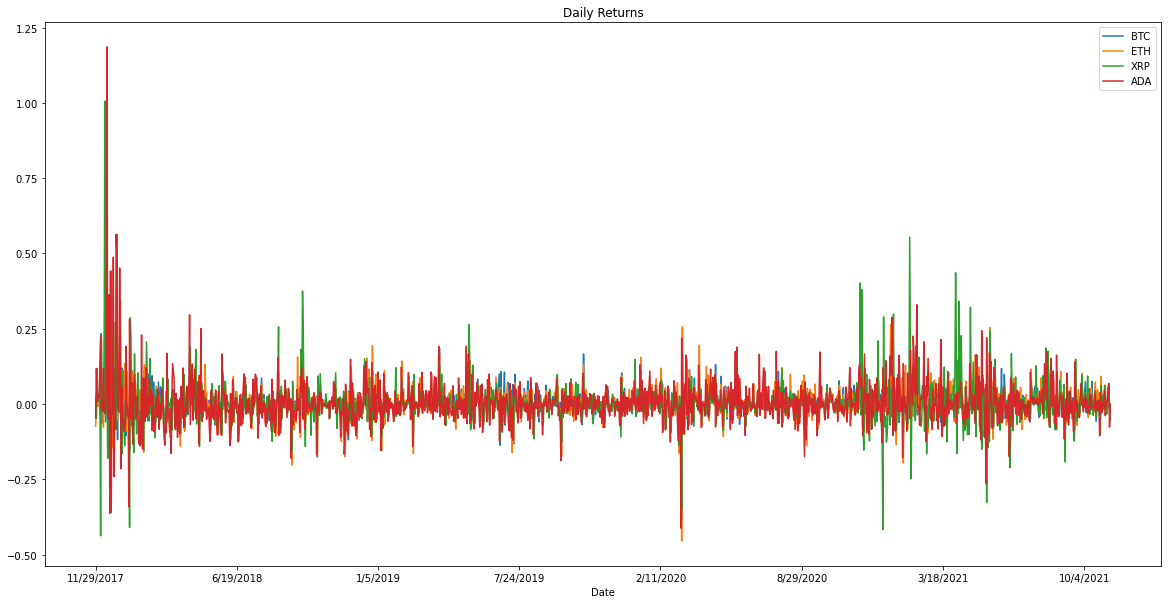

In [10]:
#Calculate and Plot the daily returns
sfo_data.plot(figsize=(20, 10), title="Daily Returns");

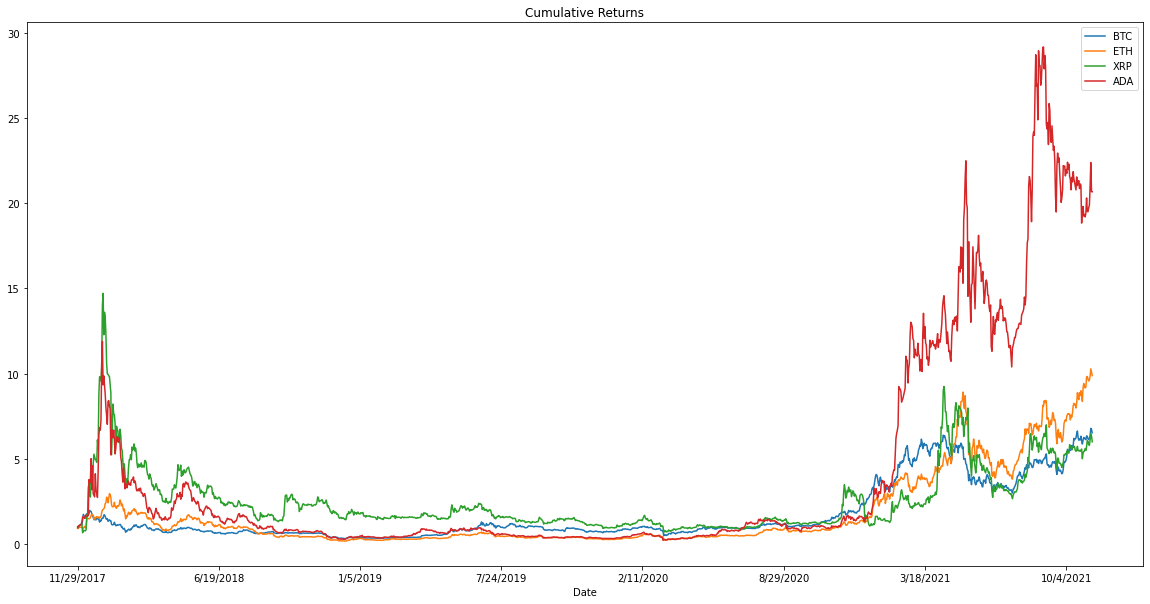

In [11]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + sfo_data).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns");

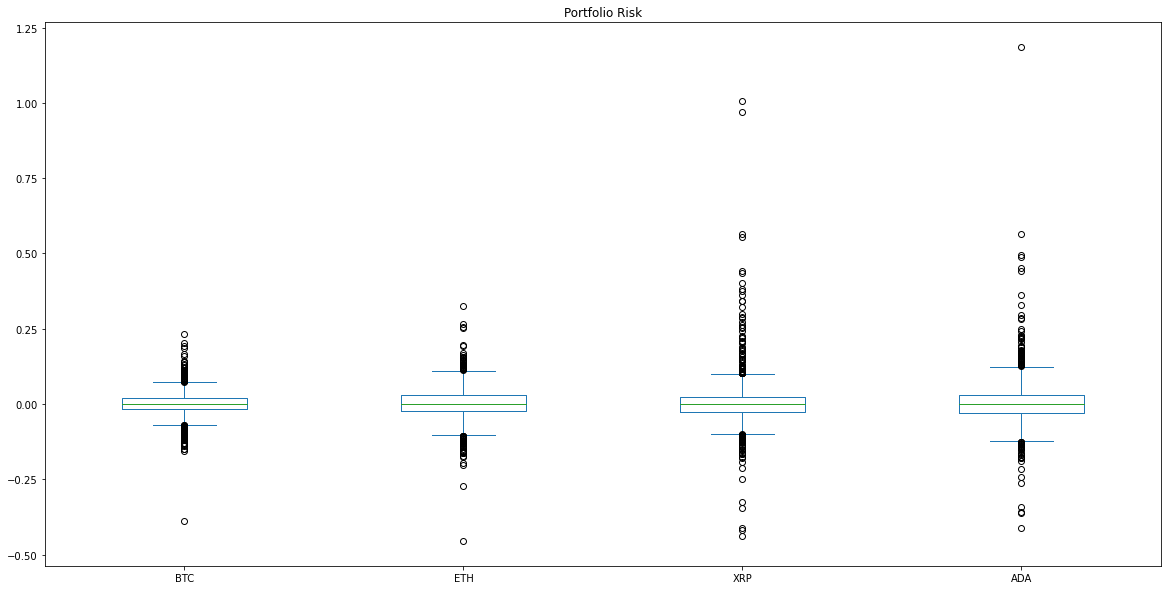

In [12]:
sfo_data.plot.box(figsize=(20, 10), title="Portfolio Risk");

In [13]:
sfo_data.std()

BTC    0.042322
ETH    0.053839
XRP    0.079674
ADA    0.078214
dtype: float64

In [14]:
# Calculate  the daily standard deviation of cryptos
crypto_risk = sfo_data['BTC'].std()

# Determine which portfolios are riskier
sfo_data.std() > crypto_risk

BTC    False
ETH     True
XRP     True
ADA     True
dtype: bool

In [15]:
anual_std = sfo_data.std() * np.sqrt(252)
anual_std

BTC    0.671845
ETH    0.854669
XRP    1.264783
ADA    1.241613
dtype: float64

In [16]:
# Rolling Statistics

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

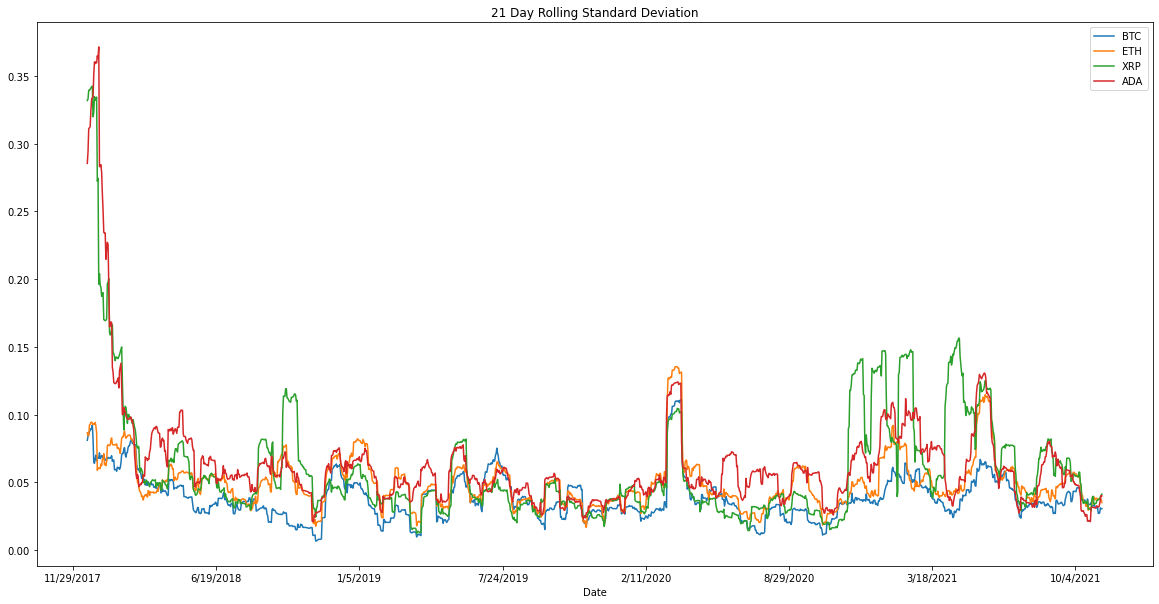

In [17]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = sfo_data.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [18]:
# Calculate the correlation
corr_df = sfo_data.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,BTC,ETH,XRP,ADA
BTC,1.000000,0.771309,0.448789,-0.055291
ETH,0.771309,1.000000,0.567119,-0.078258
XRP,0.448789,0.567119,1.000000,-0.022240
ADA,-0.055291,-0.078258,-0.022240,1.000000


<AxesSubplot:title={'center':'BTC Beta'}, xlabel='Date'>

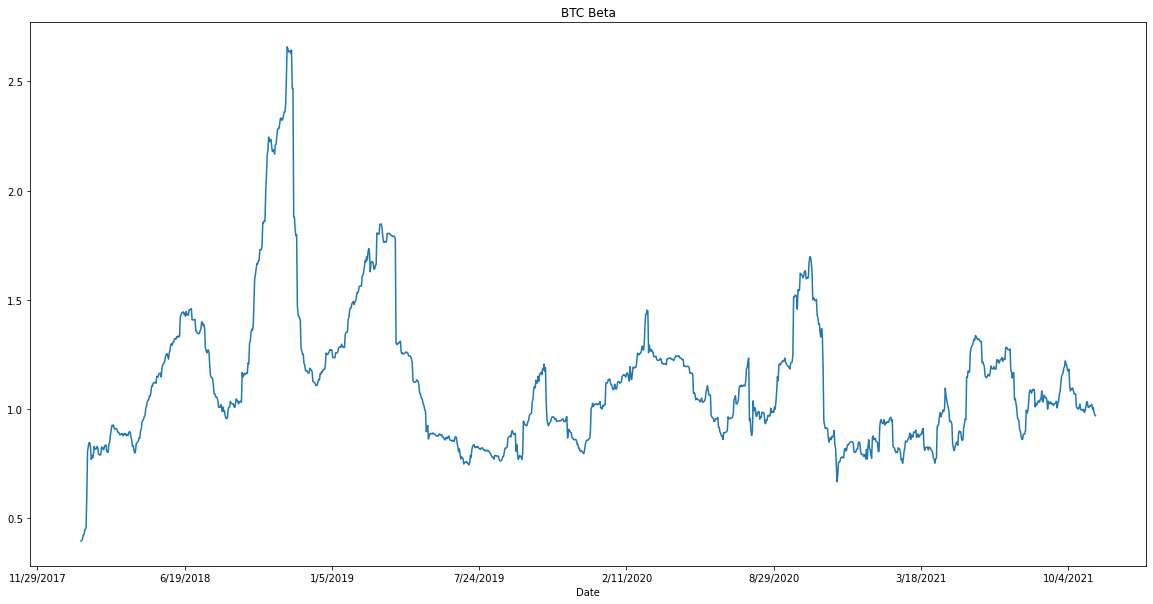

In [19]:
# Calculate covariance of a single portfolio
covariance = sfo_data["BTC"].rolling(window=60).cov(sfo_data["ETH"])

# Calculate variance of S&P TSX
variance = sfo_data["BTC"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="BTC Beta")

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

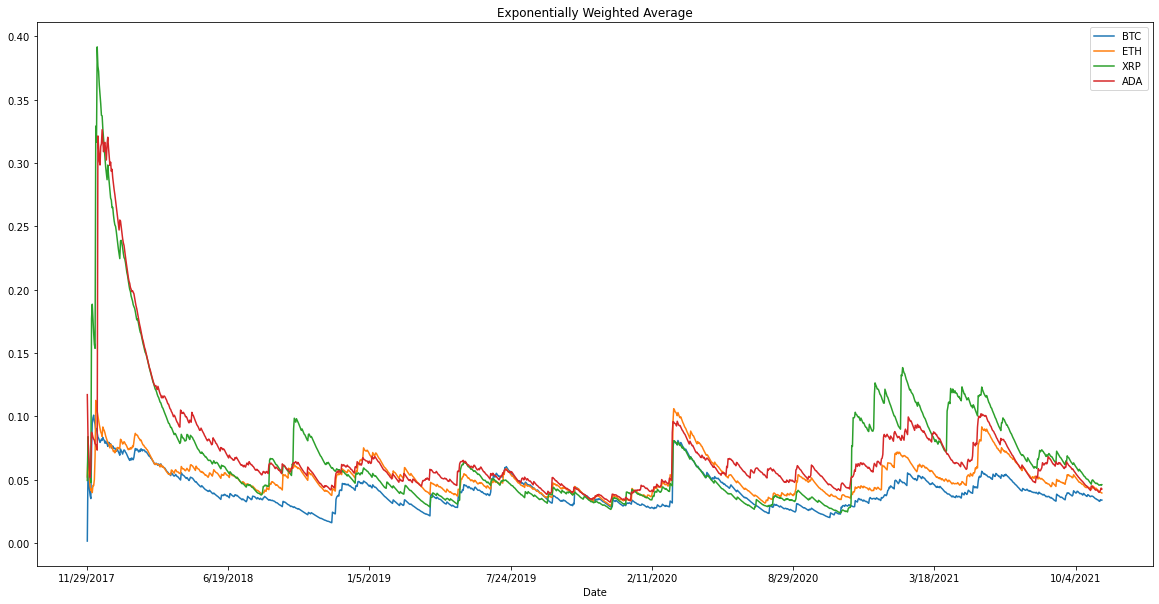

In [20]:
sfo_data.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [21]:
sharpe_ratios = (sfo_data.mean() * 252) / (sfo_data.std() * np.sqrt(252))
sharpe_ratios

BTC    0.830282
ETH    0.905882
XRP    0.814617
ADA    0.991444
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

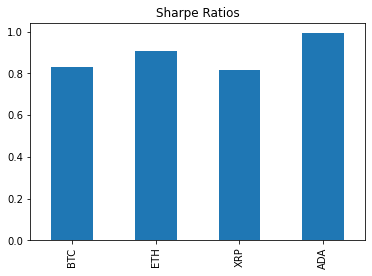

In [22]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

ADA appears to out perform all

In [23]:
#Monte Carlo
sfo_data

,BTC,ETH,XRP,ADA
Date,,,,
11/29/2017,-0.001309,-0.073657,0.022335,-0.047442
11/30/2017,-0.003319,-0.000023,-0.047442,0.118073
12/1/2017,0.097631,0.068710,0.118073,0.009142
12/2/2017,0.005557,-0.007503,0.009142,0.030313
12/3/2017,0.032914,0.009602,0.030313,0.019484
...,...,...,...,...
11/6/2021,0.007633,0.006716,-0.006637,0.007303
11/7/2021,0.028159,0.022304,0.055949,0.054371
11/8/2021,0.068125,0.043770,0.057155,0.067865


In [28]:
load_dotenv('alpaca.env')


True

In [29]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [40]:
# Set the ticker
ticker = ["SPY", "BTCUSD"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

BTCUSD                            SPY            \
                            open high  low close volume    open      high   
time                                                                        
2017-05-04 04:00:00+00:00    NaN  NaN  NaN   NaN    NaN  238.83  238.9225   
2017-05-05 04:00:00+00:00    NaN  NaN  NaN   NaN    NaN  239.18  239.7200   
2017-05-08 04:00:00+00:00    NaN  NaN  NaN   NaN    NaN  239.76  239.9200   
2017-05-09 04:00:00+00:00    NaN  NaN  NaN   NaN    NaN  239.96  240.1900   
2017-05-10 04:00:00+00:00    NaN  NaN  NaN   NaN    NaN  239.38  239.8700   

                                                     
                              low   close    volume  
time                                                 
2017-05-04 04:00:00+00:00  237.78  238.75  46170233  
2017-05-05 04:00:00+00:00  238.68  239.72  43733544  
2017-05-08 04:00:00+00:00  239.17  239.67  32087919  
2017-05-09 04:00:00+00:00  239.04  239.46  39723891  
2017-05-10 04:00:00+00:00  239.15  239.85  34222778

In [36]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_spy = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)